En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

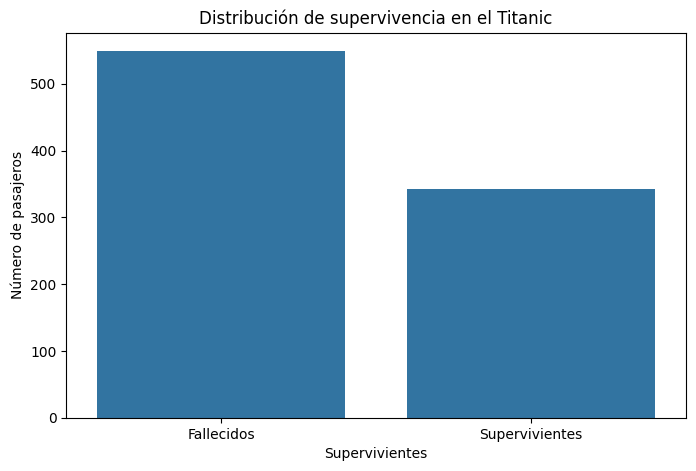

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="survived"
)
plt.xticks([0, 1], ["Fallecidos", "Supervivientes"])
plt.title("Distribución de supervivencia en el Titanic")
plt.ylabel("Número de pasajeros")
plt.xlabel("Supervivientes")
plt.savefig("supervivencia_titanic.png")
plt.show()

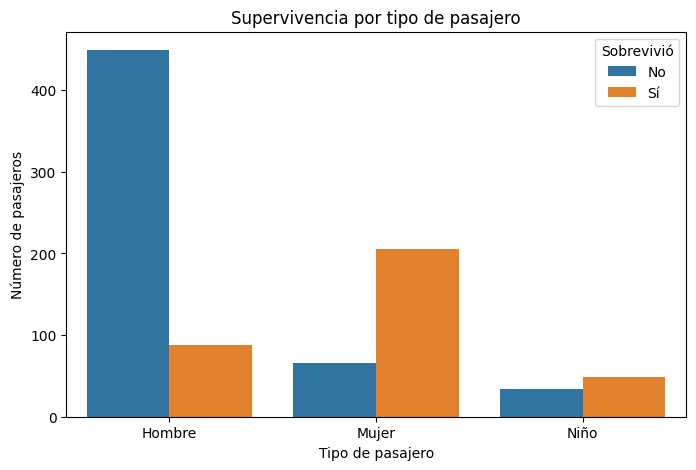

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="who",
    hue="survived"
)
plt.legend(title="Sobrevivió", labels=["No", "Sí"])
plt.title("Supervivencia por tipo de pasajero")
plt.xticks([0, 1, 2], ["Hombre", "Mujer", "Niño"])
plt.xlabel("Tipo de pasajero")
plt.ylabel("Número de pasajeros")
plt.savefig("supervivencia_who.png")
plt.show()

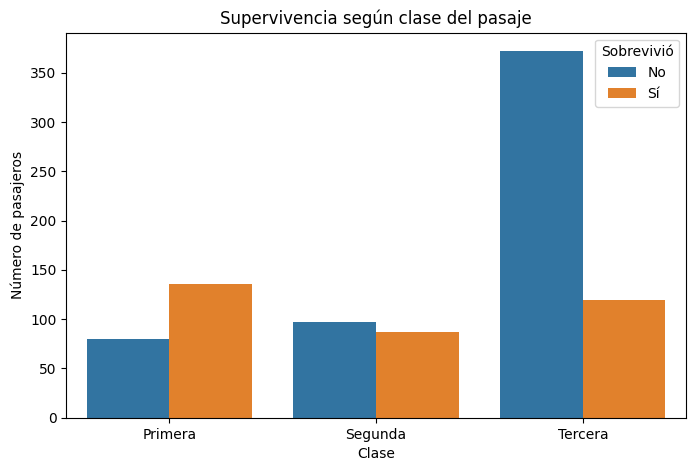

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="class",
    hue="survived",
    order = ["First", "Second", "Third"]
)
plt.legend(title="Sobrevivió", labels=["No", "Sí"])
plt.xticks([0, 1, 2], ["Primera", "Segunda", "Tercera"])
plt.title("Supervivencia según clase del pasaje")
plt.xlabel("Clase")
plt.ylabel("Número de pasajeros")
plt.savefig("supervivencia_class.png")
plt.show()

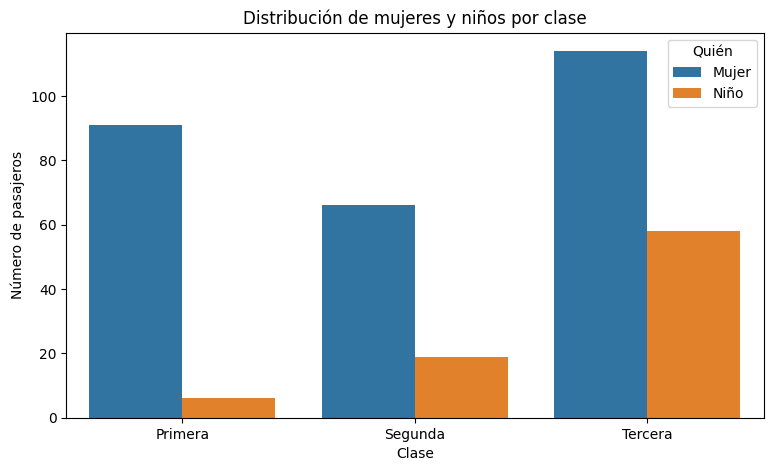

In [10]:
plt.figure(figsize=(9, 5))
sns.countplot(
    data=df[df["who"].isin(["woman", "child"])],
    x="class",
    hue="who",
    order=["First", "Second", "Third"]
)
plt.title("Distribución de mujeres y niños por clase")
plt.legend(title="Quién", labels=["Mujer", "Niño"])
plt.xlabel("Clase")
plt.ylabel("Número de pasajeros")
plt.xticks([0, 1, 2], ["Primera", "Segunda", "Tercera"])
plt.savefig("supervivencia_mujerniño.png")
plt.show()

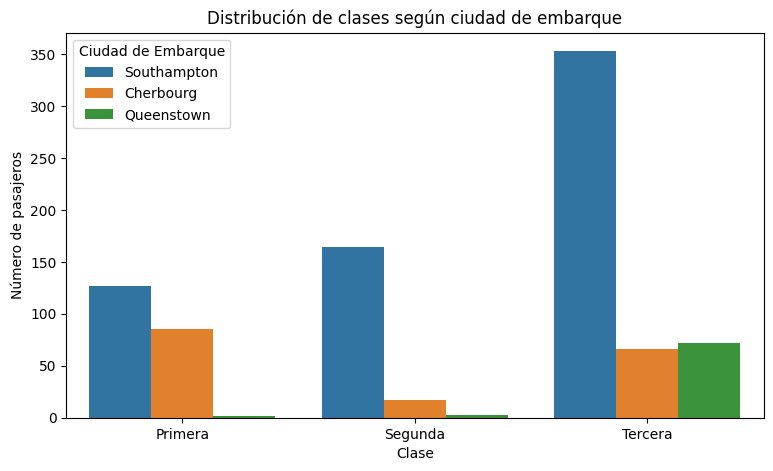

In [9]:
plt.figure(figsize=(9, 5))
sns.countplot(
    data=df,
    x="class",
    hue="embark_town",
    order=["First", "Second", "Third"]
)

plt.title("Distribución de clases según ciudad de embarque")
plt.legend(title = "Ciudad de Embarque")
plt.ylabel("Número de pasajeros")
plt.xlabel("Clase")
plt.xticks([0, 1, 2],["Primera", "Segunda", "Tercera"])
plt.savefig("embarque_x_clases")
plt.show()